# Clustering of global and local features

Attempting to apply clustering and extract features 

In [1]:
#Necessary imports

import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [2]:


csv_dir = '../Datasets/Mouse B-ENaC Study/csv/'
csv_files = [file for file in os.listdir(csv_dir) if file.endswith('.csv')]


dataframes = []
for file in csv_files:
    file_path = os.path.join(csv_dir, file)
    dataframes.append([pd.read_csv(file_path),file_path])

control=[]
beta=[]

for d,p in dataframes:
    if 'wt' in p:
        control.append(d)
    else:
        beta.append(d)

In [3]:
print(len(control),len(beta))


14 14


In [4]:
control[0]['Specific Ventilation (mL/mL)']

0       0.048627
1       0.094843
2       0.126857
3       0.328373
4       0.261605
          ...   
4366    0.725515
4367    0.419779
4368    0.192886
4369    0.124587
4370    0.224264
Name: Specific Ventilation (mL/mL), Length: 4371, dtype: float64

In [5]:
ventAll=[]

for d in control:
    ventAll.extend(d['Specific Ventilation (mL/mL)'])

ventAll=np.array(ventAll)

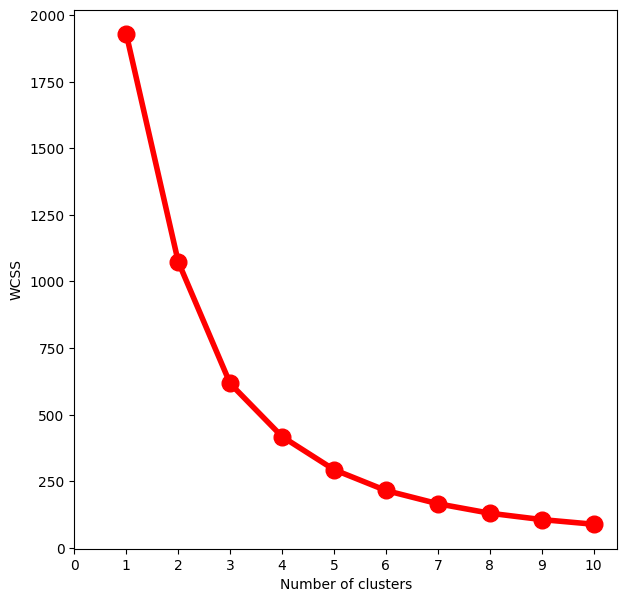

In [6]:
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(ventAll.reshape(-1, 1))
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'red')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [7]:
gCluster= KMeans(n_clusters = 6,init = 'k-means++')
gCluster.fit(ventAll.reshape(-1, 1))

KMeans(n_clusters=6)

In [8]:
# Assign cluster labels to each data point
pred = gCluster.predict(ventAll.reshape(-1, 1))


clusters=pd.DataFrame(ventAll,columns=['Specific Ventilation'])
clusters['Cluster']=pred


avg_vent=clusters.groupby('Cluster')['Specific Ventilation'].mean()
sorted_clusters = avg_vent.sort_values().index


cluster_mapping = {old: new for new, old in enumerate(sorted_clusters)}


clusters['Cluster'] = clusters['Cluster'].map(cluster_mapping)
vent=clusters.groupby('Cluster')['Specific Ventilation'].mean()
clusters.groupby('Cluster').describe()



Specific Ventilation                                          \
                       count      mean       std       min       25%   
Cluster                                                                
0                     1776.0 -0.098266  0.160195 -1.107370 -0.156067   
1                    12277.0  0.199349  0.054923  0.051898  0.164583   
2                    30000.0  0.336290  0.034484  0.268403  0.308827   
3                    14605.0  0.454819  0.047124  0.396075  0.415675   
4                     3520.0  0.695004  0.091558  0.575612  0.617015   
5                      805.0  1.132586  0.211454  0.914723  0.981651   

                                       
              50%       75%       max  
Cluster                                
0       -0.046457  0.017116  0.051854  
1        0.213333  0.244706  0.268386  
2        0.337970  0.364932  0.396072  
3        0.442312  0.485053  0.575518  
4        0.671874  0.760919  0.914412  
5        1.072060  1.221940  2.338500

## Comparison with  beta mice
Just for comparison with unhealthy mice

In [9]:
ventB=[]

for d in beta:
    ventB.extend(d['Specific Ventilation (mL/mL)'])

ventB=np.array(ventB)

In [10]:
BCluster= KMeans(n_clusters = 6,init = 'k-means++')
BCluster.fit(ventB.reshape(-1, 1))

KMeans(n_clusters=6)

In [11]:
pred = BCluster.predict(ventB.reshape(-1, 1))


clustersB=pd.DataFrame(ventB,columns=['Specific Ventilation'])
clustersB['Cluster']=pred


avg_vent=clustersB.groupby('Cluster')['Specific Ventilation'].mean()
sorted_clusters = avg_vent.sort_values().index


cluster_mapping = {old: new for new, old in enumerate(sorted_clusters)}


clustersB['Cluster'] = clustersB['Cluster'].map(cluster_mapping)
vent=clustersB.groupby('Cluster')['Specific Ventilation'].mean()
clustersB.groupby('Cluster').describe()

Specific Ventilation                                          \
                       count      mean       std       min       25%   
Cluster                                                                
0                     3641.0 -0.090491  0.169883 -2.135620 -0.134428   
1                    17932.0  0.183001  0.057050  0.046678  0.141632   
2                    40470.0  0.336143  0.037643  0.259991  0.306261   
3                    18762.0  0.459832  0.051897  0.398544  0.417560   
4                     4911.0  0.732307  0.097828  0.596958  0.648330   
5                     1355.0  1.174451  0.242402  0.954317  1.011850   

                                       
              50%       75%       max  
Cluster                                
0       -0.037341  0.013217  0.046608  
1        0.194999  0.231576  0.259977  
2        0.339219  0.367817  0.398521  
3        0.443597  0.491627  0.596825  
4        0.713965  0.805972  0.953889  
5        1.092290  1.258805  3.225370

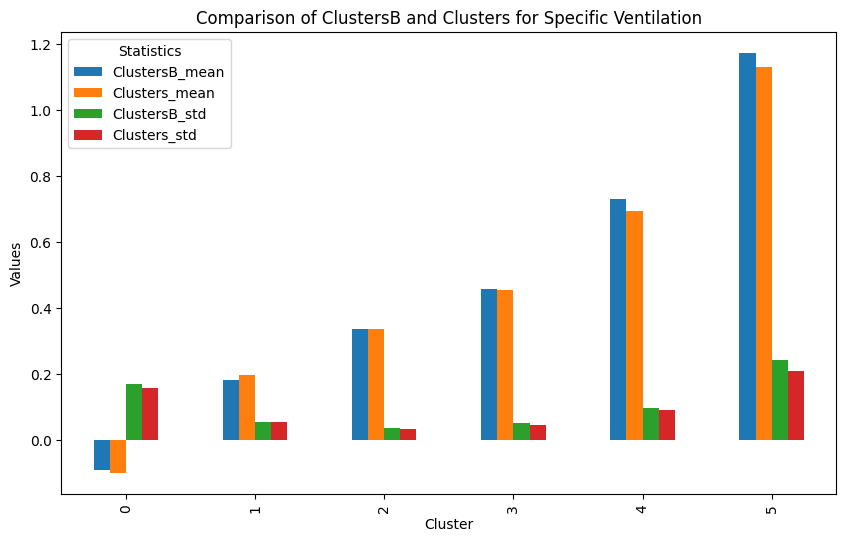

In [12]:

clustersB_summary = clustersB.groupby('Cluster').describe()
clusters_summary = clusters.groupby('Cluster').describe()

combined = pd.DataFrame({
    'ClustersB_mean': clustersB_summary['Specific Ventilation']['mean'],
    'Clusters_mean': clusters_summary['Specific Ventilation']['mean'],
    'ClustersB_std': clustersB_summary['Specific Ventilation']['std'],
    'Clusters_std': clusters_summary['Specific Ventilation']['std']
})

combined.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of ClustersB and Clusters for Specific Ventilation')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.legend(title='Statistics')
plt.show()


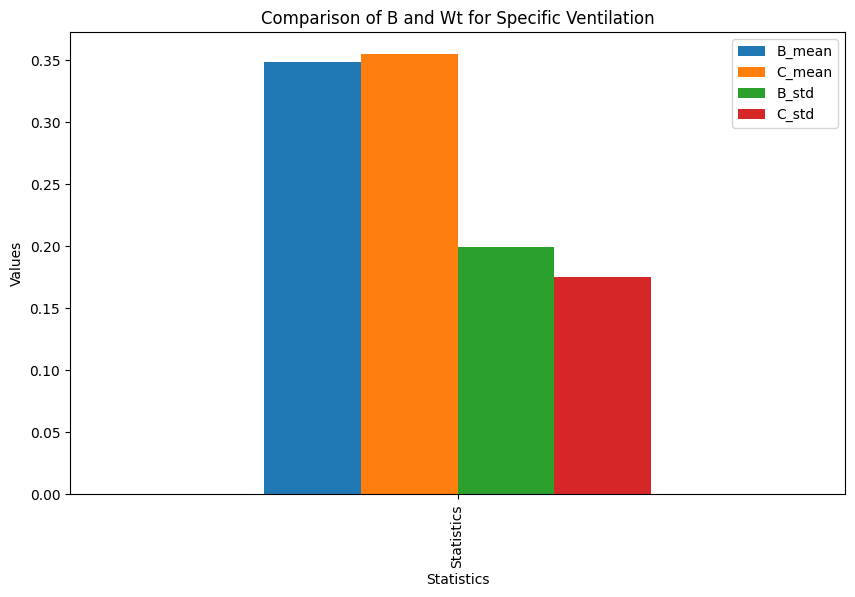

In [13]:
betaCombined=pd.concat(beta, ignore_index=True)
controlCombined=pd.concat(control, ignore_index=True)
B_summary = betaCombined.describe()
summary = controlCombined.describe()


combined = pd.DataFrame({
    'B_mean': [B_summary['Specific Ventilation (mL/mL)']['mean']],
    'C_mean': [summary['Specific Ventilation (mL/mL)']['mean']],
    'B_std': [B_summary['Specific Ventilation (mL/mL)']['std']],
    'C_std': [summary['Specific Ventilation (mL/mL)']['std']]
}, index=['Statistics'])

combined.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of B and Wt for Specific Ventilation')
plt.xlabel('Statistics')
plt.ylabel('Values')
plt.show()



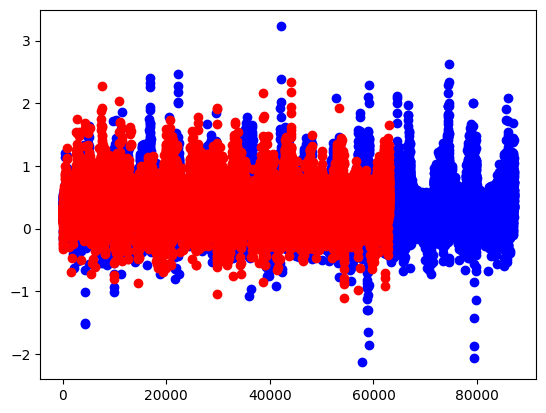

In [14]:
plt.scatter(range(len(ventB)), ventB, color='blue')
plt.scatter(range(len(ventAll)), ventAll, color='red')
plt.show()


# Do clustering now on individual samples

In [15]:
sample=beta[0]
sample

,Specific Ventilation (mL/mL),x (mm),y (mm),z (mm)
0,0.169529,-0.830772,2.29684,-5.87124
1,0.214410,-0.309504,2.29684,-5.87124
2,0.189916,0.211765,2.29684,-5.87124
3,0.150202,0.733034,2.29684,-5.87124
4,0.176690,1.254300,2.29684,-5.87124
...,...,...,...,...
5007,1.125580,-0.309504,-2.91585,9.24556
5008,1.293680,0.211765,-2.91585,9.24556
5009,1.049120,-0.309504,-3.95839,9.76683
5010,1.462120,-0.309504,-3.43712,9.76683


In [16]:
pred=gCluster.predict(pd.DataFrame(sample['Specific Ventilation (mL/mL)']))


sample['gCluster']=pred


avg_vent=sample.groupby('gCluster')['Specific Ventilation (mL/mL)'].mean()
sorted_clusters = avg_vent.sort_values().index


cluster_mapping = {old: new for new, old in enumerate(sorted_clusters)}


sample['gCluster'] = sample['gCluster'].map(cluster_mapping)
vent=sample.groupby('gCluster')['Specific Ventilation (mL/mL)'].mean()
g=sample.groupby('gCluster')['Specific Ventilation (mL/mL)'].describe()
g

/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,count,mean,std,min,25%,50%,75%,max
gCluster,,,,,,,,
0,207.0,-0.081460,0.198112,-1.528700,-0.108143,-0.021987,0.021219,0.051813
1,864.0,0.189876,0.058845,0.052898,0.144823,0.202691,0.241360,0.268315
2,1920.0,0.344133,0.034714,0.268460,0.317625,0.350919,0.373047,0.396047
3,1577.0,0.453238,0.044937,0.396194,0.416756,0.441866,0.481585,0.575076
4,348.0,0.693819,0.094554,0.576444,0.610680,0.669183,0.765772,0.913782
5,96.0,1.089641,0.150118,0.923360,0.985206,1.042305,1.151430,1.635170


In [17]:
lCluster=KMeans(n_clusters=6,init = 'k-means++')
pred=lCluster.fit_predict(pd.DataFrame(sample['Specific Ventilation (mL/mL)']))


sample['lCluster']=pred


avg_vent=sample.groupby('lCluster')['Specific Ventilation (mL/mL)'].mean()
sorted_clusters = avg_vent.sort_values().index


cluster_mapping = {old: new for new, old in enumerate(sorted_clusters)}


sample['lCluster'] = sample['lCluster'].map(cluster_mapping)
vent=sample.groupby('lCluster')['Specific Ventilation (mL/mL)'].mean()
l=sample.groupby('lCluster')['Specific Ventilation (mL/mL)'].describe()
l


,count,mean,std,min,25%,50%,75%,max
lCluster,,,,,,,,
0,76.0,-0.231034,0.264935,-1.528700,-0.245297,-0.147975,-0.103396,-0.063754
1,549.0,0.106675,0.068513,-0.062858,0.058491,0.121329,0.164040,0.199439
2,1481.0,0.293723,0.043251,0.199496,0.260106,0.301605,0.330479,0.354767
3,2309.0,0.416940,0.042926,0.354838,0.381288,0.409738,0.445758,0.524127
4,465.0,0.632302,0.086012,0.524393,0.561195,0.603823,0.685132,0.830558
5,132.0,1.030231,0.161173,0.832262,0.909907,0.994450,1.111608,1.635170


In [18]:
# Compute descriptive statistics for l and g
l_stats = l
g_stats = g




l_stats.columns = ['l_' + col for col in l_stats.columns]
g_stats.columns = ['g_' + col for col in g_stats.columns]


l_stats = l_stats.reset_index()
g_stats = g_stats.reset_index()

# Merge on matching clusters (lCluster == gCluster)
merged_stats = pd.merge(l_stats, g_stats, left_on='lCluster', right_on='gCluster', how='inner')

# Drop unnecessary columns if required (e.g., duplicate cluster columns)
merged_stats = merged_stats.drop(columns=['gCluster'])
merged_stats=merged_stats.dropna(axis=1, how='all').reset_index(drop=True)
merged_stats


,lCluster,l_count,l_mean,l_std,l_min,l_25%,l_50%,l_75%,l_max,g_count,g_mean,g_std,g_min,g_25%,g_50%,g_75%,g_max
0,0,76.0,-0.231034,0.264935,-1.528700,-0.245297,-0.147975,-0.103396,-0.063754,207.0,-0.081460,0.198112,-1.528700,-0.108143,-0.021987,0.021219,0.051813
1,1,549.0,0.106675,0.068513,-0.062858,0.058491,0.121329,0.164040,0.199439,864.0,0.189876,0.058845,0.052898,0.144823,0.202691,0.241360,0.268315
2,2,1481.0,0.293723,0.043251,0.199496,0.260106,0.301605,0.330479,0.354767,1920.0,0.344133,0.034714,0.268460,0.317625,0.350919,0.373047,0.396047
3,3,2309.0,0.416940,0.042926,0.354838,0.381288,0.409738,0.445758,0.524127,1577.0,0.453238,0.044937,0.396194,0.416756,0.441866,0.481585,0.575076
4,4,465.0,0.632302,0.086012,0.524393,0.561195,0.603823,0.685132,0.830558,348.0,0.693819,0.094554,0.576444,0.610680,0.669183,0.765772,0.913782
5,5,132.0,1.030231,0.161173,0.832262,0.909907,0.994450,1.111608,1.635170,96.0,1.089641,0.150118,0.923360,0.985206,1.042305,1.151430,1.635170


In [19]:
l.drop(columns=['gCluster'])
g.drop(columns=['lCluster'])

feat=pd.concat([g,l],join='inner')


KeyError: "['gCluster'] not found in axis"

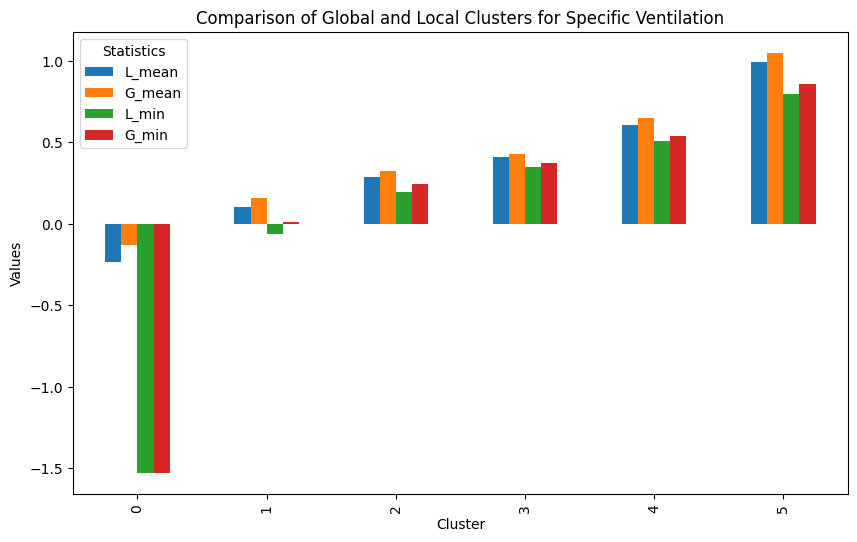

In [ ]:

L_summary = sample.groupby('lCluster').describe()
G_summary = sample.groupby('gCluster').describe()

combined = pd.DataFrame({
    'L_mean': L_summary['Specific Ventilation (mL/mL)']['mean'],
    'G_mean': G_summary['Specific Ventilation (mL/mL)']['mean'],
    'L_min':L_summary['Specific Ventilation (mL/mL)']['min'],
    'G_min':G_summary['Specific Ventilation (mL/mL)']['min']

})

combined.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Global and Local Clusters for Specific Ventilation')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.legend(title='Statistics')
plt.show()


In [ ]:
sample=control[0]
sample

,Specific Ventilation (mL/mL),x (mm),y (mm),z (mm)
0,0.048627,0.195467,0.716711,-5.76218
1,0.094843,0.716711,0.716711,-5.76218
2,0.126857,1.237960,0.716711,-5.76218
3,0.328373,-1.368260,1.237960,-5.76218
4,0.261605,-0.847020,1.237960,-5.76218
...,...,...,...,...
4366,0.725515,1.759200,-5.016970,8.83264
4367,0.419779,1.237960,-4.495730,8.83264
4368,0.192886,0.716711,-3.974480,8.83264
4369,0.124587,0.195467,-3.453240,8.83264


In [ ]:
pred=gCluster.predict(pd.DataFrame(sample['Specific Ventilation (mL/mL)']))


sample['gCluster']=pred


avg_vent=sample.groupby('gCluster')['Specific Ventilation (mL/mL)'].mean()
sorted_clusters = avg_vent.sort_values().index


cluster_mapping = {old: new for new, old in enumerate(sorted_clusters)}


sample['gCluster'] = sample['gCluster'].map(cluster_mapping)
vent=sample.groupby('gCluster')['Specific Ventilation (mL/mL)'].mean()
sample.groupby('gCluster').describe()

/Users/spb/XV_Imaging/Code/env/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


Specific Ventilation (mL/mL)                                          \
                                count      mean       std       min       25%   
gCluster                                                                        
0                                53.0 -0.113571  0.142907 -0.689437 -0.144212   
1                               580.0  0.177246  0.058578  0.014012  0.143292   
2                              1776.0  0.318098  0.035157  0.246042  0.289418   
3                              1575.0  0.426972  0.040235  0.373377  0.394557   
4                               319.0  0.649031  0.086326  0.538711  0.573124   
5                                68.0  1.067345  0.226110  0.861427  0.904218   

                                        x (mm)            ...    y (mm)  \
               50%       75%       max   count      mean  ...       75%   
gCluster                                                  ...             
0        -0.067158 -0.011824  0.010096    53.0  1.395312  ...  3.844170   
1         0.195271  0.226804  0.245697   580.0  0.576515  ...  1.759200   
2         0.321245  0.347936  0.373318  1776.0  0.952680  ...  0.716711   
3         0.418057  0.450117  0.537584  1575.0  0.283500  ...  1.237960   
4         0.636325  0.701122  0.859119   319.0 -0.257148  ...  2.801690   
5         0.973179  1.121367  1.743560    68.0  0.693716  ...  5.929150   

                   z (mm)                                                  \
              max   count      mean       std      min       25%      50%   
gCluster                                                                    
0         5.92915    53.0  0.994320  4.289721 -5.76218 -3.677200  2.05648   
1         5.92915   580.0  1.850675  3.777581 -5.76218 -1.070980  2.57772   
2         5.92915  1776.0  2.054422  3.221890 -5.76218 -0.549742  2.57772   
3         6.45039  1575.0  2.292112  2.536610 -4.71969  0.492746  2.57772   
4         6.45039   319.0  3.396351  3.022173 -4.19845  1.013990  3.62021   
5         6.45039    68.0  4.340750  2.936236 -2.63472  3.489898  4.14145   

                            
              75%      max  
gCluster                    
0         5.18394  6.22643  
1         5.18394  8.83264  
2         4.66269  8.31140  
3         4.14145  8.83264  
4         6.22643  8.83264  
5         6.87798  8.31140  

[6 rows x 32 columns]

In [ ]:
lCluster=KMeans(n_clusters=6,init = 'k-means++')
pred=lCluster.fit_predict(pd.DataFrame(sample['Specific Ventilation (mL/mL)']))


sample['lCluster']=pred


avg_vent=sample.groupby('lCluster')['Specific Ventilation (mL/mL)'].mean()
sorted_clusters = avg_vent.sort_values().index


cluster_mapping = {old: new for new, old in enumerate(sorted_clusters)}


sample['lCluster'] = sample['lCluster'].map(cluster_mapping)
vent=sample.groupby('lCluster')['Specific Ventilation (mL/mL)'].mean()
sample.groupby('lCluster').describe()


Specific Ventilation (mL/mL)                                          \
                                count      mean       std       min       25%   
lCluster                                                                        
0                               196.0  0.035088  0.120701 -0.689437  0.002607   
1                              1059.0  0.248070  0.041993  0.141155  0.222456   
2                              1831.0  0.359025  0.030604  0.303165  0.332879   
3                              1001.0  0.464658  0.045856  0.411293  0.427857   
4                               243.0  0.713404  0.095810  0.588762  0.638429   
5                                41.0  1.180222  0.228908  0.947043  0.996608   

                                        x (mm)            ...   z (mm)  \
               50%       75%       max   count      mean  ...      75%   
lCluster                                                  ...            
0         0.073453  0.112336  0.140891   196.0  0.979993  ...  5.18394   
1         0.256912  0.284022  0.303120  1059.0  0.701453  ...  4.66269   
2         0.361056  0.384856  0.411127  1831.0  0.808947  ...  4.14145   
3         0.449855  0.491372  0.586969  1001.0  0.037689  ...  4.14145   
4         0.688679  0.788938  0.940284   243.0  0.225498  ...  6.48705   
5         1.101810  1.294030  1.743560    41.0  0.081049  ...  6.74767   

                  gCluster                                               
              max    count      mean       std  min  25%  50%  75%  max  
lCluster                                                                 
0         8.83264    196.0  0.729592  0.445308  0.0  0.0  1.0  1.0  1.0  
1         8.83264   1059.0  1.587347  0.492544  1.0  1.0  2.0  2.0  2.0  
2         8.31140   1831.0  2.369743  0.482867  2.0  2.0  2.0  3.0  3.0  
3         8.83264   1001.0  3.102897  0.303976  3.0  3.0  3.0  3.0  4.0  
4         8.83264    243.0  4.111111  0.314918  4.0  4.0  4.0  4.0  5.0  
5         8.31140     41.0  5.000000  0.000000  5.0  5.0  5.0  5.0  5.0  

[6 rows x 40 columns]

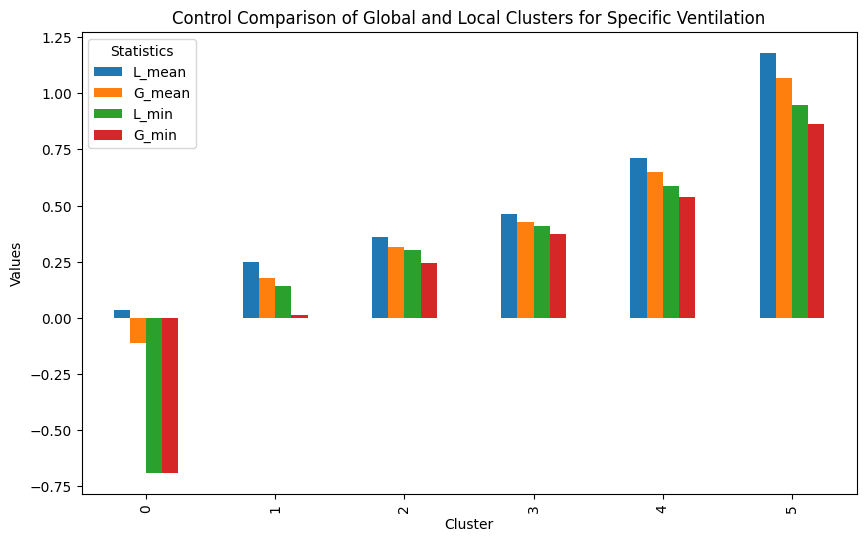

In [ ]:

L_summary = sample.groupby('lCluster').describe()
G_summary = sample.groupby('gCluster').describe()

combined = pd.DataFrame({
    'L_mean': L_summary['Specific Ventilation (mL/mL)']['mean'],
    'G_mean': G_summary['Specific Ventilation (mL/mL)']['mean'],
    'L_min':L_summary['Specific Ventilation (mL/mL)']['min'],
    'G_min':G_summary['Specific Ventilation (mL/mL)']['min']

})

combined.plot(kind='bar', figsize=(10, 6))
plt.title('Control Comparison of Global and Local Clusters for Specific Ventilation')
plt.xlabel('Cluster')
plt.ylabel('Values')
plt.legend(title='Statistics')
plt.show()
